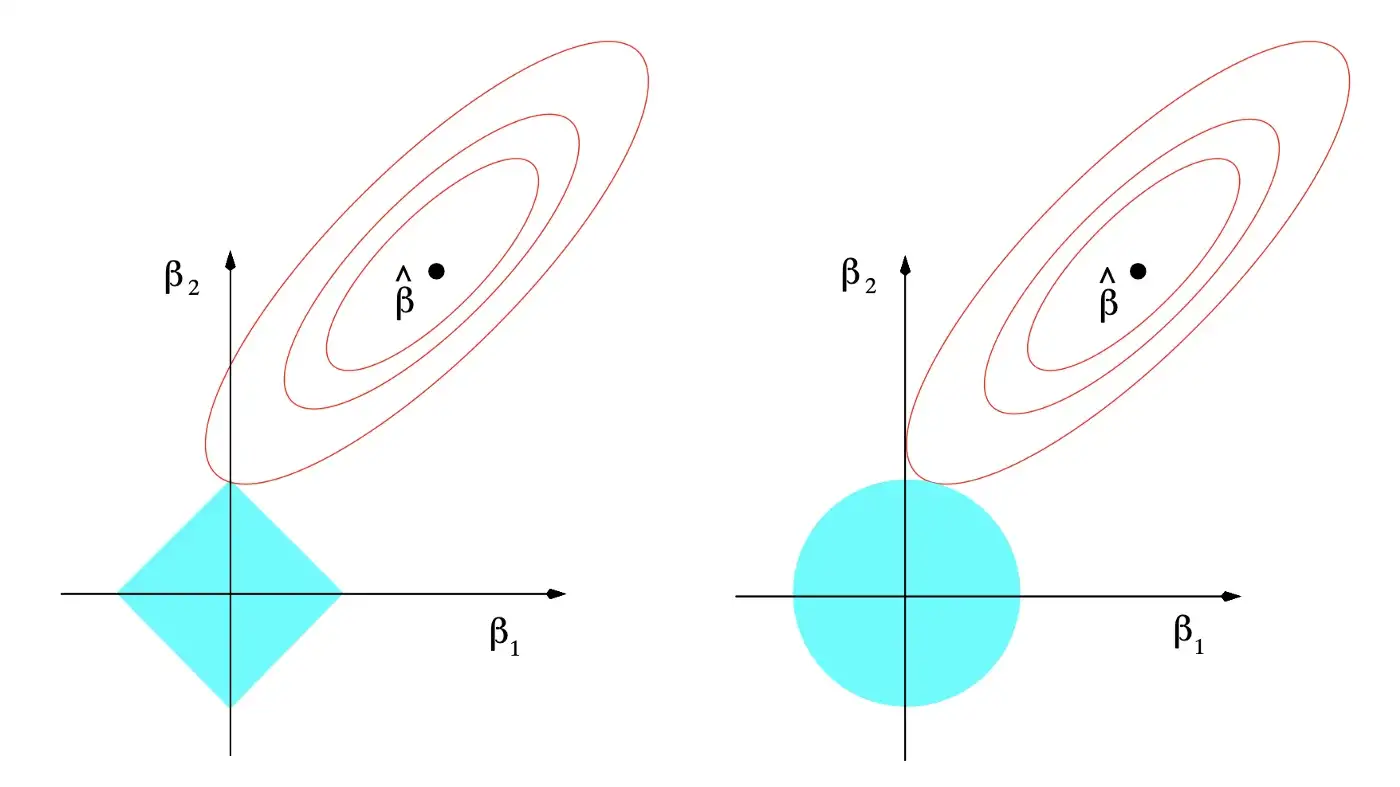

## 릿지 회귀(Ridge Regression)

- L2-norm 패널티를 더한 선형회귀 model
  - 기존 선형 모델에 규제항을 추가해 overfitting을 해결
- 가중치(회귀계수)의 절대값 규제(regularization)하여 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 한다.
- 릿지 회귀는 회귀계수를 0에 가깝게하지만 0으로 만들지 않음(이미지 참고)

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  - $\alpha$: 사용자가 지정하는 매개변수
  - $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  - $\alpha$가 없으면 일반적인 선형 회귀와 같다.

__참고__ 
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
  - 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

### 보스턴 주택 가격에 대한 릿지 회귀

In [1]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

/home/apollo/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [5]:
model = Ridge(alpha = 0.2)
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [6]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7260980010458834
Test Data Score: 0.7811137604441751


In [11]:
import matplotlib.pyplot as plt
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') 
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

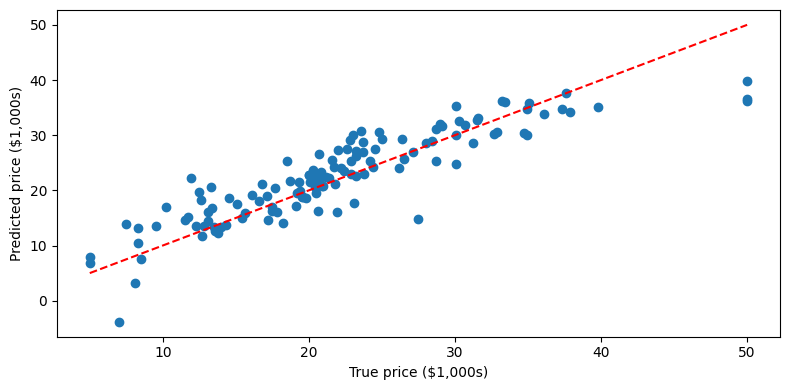

In [12]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 릿지 회귀
- alpha 값을 0.1, 0.2, 0.3, 0.4, 0.5 까지 작성하여 비교해 보세요 
- alpha 가 너무 작으면 overfitting, 너무 크면  underfitting 발생

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
california = fetch_california_housing()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)
model = Ridge(alpha = 0.2)
model.fit(x_train, y_train)

Ridge(alpha=0.2)

In [23]:
model.alpha

0.2

In [19]:
import numpy as np

In [25]:
models = [Ridge(alpha = round(i, 1)) for i in np.arange(0, 1, 0.1)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}", f'Train Data Score: {model.score(x_train, y_train)}' , f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 0.0 Train Data Score: 0.6039931416674718 Test Data Score: 0.6137978976801961
alpha : 0.1 Train Data Score: 0.603993141296226 Test Data Score: 0.6137969848492066
alpha : 0.2 Train Data Score: 0.6039931401830084 Test Data Score: 0.6137960716469969
alpha : 0.3 Train Data Score: 0.6039931383285975 Test Data Score: 0.6137951580740932
alpha : 0.4 Train Data Score: 0.6039931357337704 Test Data Score: 0.6137942441310218
alpha : 0.5 Train Data Score: 0.6039931323993043 Test Data Score: 0.6137933298183076
alpha : 0.6 Train Data Score: 0.6039931283259745 Test Data Score: 0.6137924151364752
alpha : 0.7 Train Data Score: 0.6039931235145559 Test Data Score: 0.6137915000860488
alpha : 0.8 Train Data Score: 0.6039931179658222 Test Data Score: 0.6137905846675511
alpha : 0.9 Train Data Score: 0.6039931116805468 Test Data Score: 0.6137896688815045


In [26]:
# LinearRegression 에 대한 결과
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6039931416674715
Test Data Score: 0.613797897680196


## 라쏘 회귀(Lasso Regression)
- L1-norm 패널티를 더한 선형회귀 model
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고 제거(이미지 참고)
    - model 을 단순하게 만들어 overfitting 을 방지 한다. 

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [13]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [14]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

/home/apollo/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [38]:
model = Lasso(alpha = 0.1)
# model = Lasso(alpha = 0.01)
# model = Lasso(alpha = 0.001)
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [39]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7288387244471606
Test Data Score: 0.7113726807733725


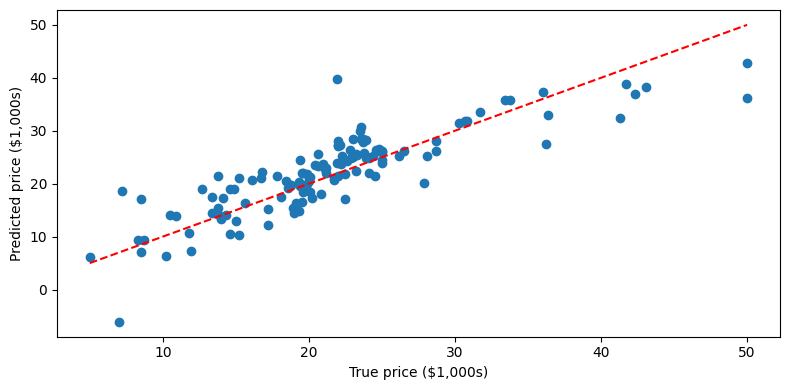

In [40]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

## 신축망 (Elastic-Net)

- 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델. 
- 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 준다.

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

- $\alpha$: 규제의 강도를 조절하는 매개변수
- $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [58]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

/home/apollo/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [68]:
model = ElasticNet(alpha=0.001, l1_ratio=0.5)
model.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [69]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7463031282455064
Test Data Score: 0.7137581531072112


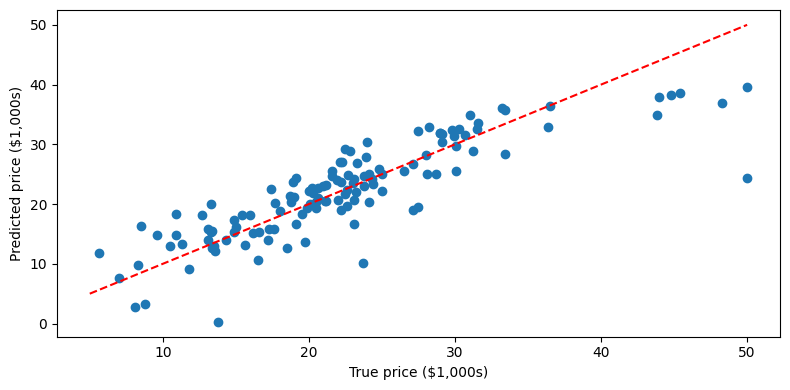

In [70]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 신축망

In [68]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()